# 1. Import Libraries

In [31]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

# 2. Setup Kaggle Import

In [2]:
!pip install kaggle

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d phucthaiv02/butterfly-image-classification

Dataset URL: https://www.kaggle.com/datasets/phucthaiv02/butterfly-image-classification
License(s): CC0-1.0
100% 225M/226M [00:02<00:00, 179MB/s]
100% 226M/226M [00:02<00:00, 113MB/s]


In [6]:
!unzip butterfly-image-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/Image_2348.jpg    
  inflating: train/Image_2349.jpg    
  inflating: train/Image_235.jpg     
  inflating: train/Image_2350.jpg    
  inflating: train/Image_2351.jpg    
  inflating: train/Image_2352.jpg    
  inflating: train/Image_2353.jpg    
  inflating: train/Image_2354.jpg    
  inflating: train/Image_2355.jpg    
  inflating: train/Image_2356.jpg    
  inflating: train/Image_2357.jpg    
  inflating: train/Image_2358.jpg    
  inflating: train/Image_2359.jpg    
  inflating: train/Image_236.jpg     
  inflating: train/Image_2360.jpg    
  inflating: train/Image_2361.jpg    
  inflating: train/Image_2362.jpg    
  inflating: train/Image_2363.jpg    
  inflating: train/Image_2364.jpg    
  inflating: train/Image_2365.jpg    
  inflating: train/Image_2366.jpg    
  inflating: train/Image_2367.jpg    
  inflating: train/Image_2368.jpg    
  inflating: train/Image_2369.jpg    
  inflating: train/Image_237.jpg     

# 3. Import Data

In [8]:
df = pd.read_csv('Training_set.csv')

In [9]:
df.head()

,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART


In [10]:
df.shape

(6499, 2)

In [11]:
df['label'].value_counts()

,count
label,
MOURNING CLOAK,131
SLEEPY ORANGE,107
ATALA,100
BROWN SIPROETA,99
CRECENT,97
...,...
AMERICAN SNOOT,74
GOLD BANDED,73
MALACHITE,73


In [12]:
df['label'].nunique()

75

## 3.2 Splitting Data

In [27]:
train_data, val_data = train_test_split(df, test_size=0.2, random_state=42)

# 4. Data Preprocessing

In [28]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    rescale=1.0/255.0
)

In [29]:
train_data = datagen.flow_from_dataframe(
    dataframe=train_data,
    directory='/content/train',
    x_col='filename',
    y_col='label',
    target_size=(256,256),
    batch_size=32,
    class_mode='categorical',
)

val_data = val_datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='/content/train',
    x_col='filename',
    y_col='label',
    target_size=(256,256),
    batch_size=32,
    class_mode='categorical',
)

Found 5199 validated image filenames belonging to 75 classes.
Found 1300 validated image filenames belonging to 75 classes.


# 5.Visualizing Data

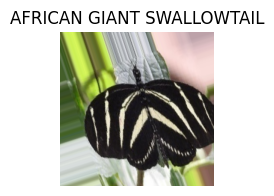

In [35]:
images, labels = next(train_data)
class_names = {v: k for k, v in train_data.class_indices.items()}

plt.figure(figsize=(2, 2))
plt.imshow(images[1])
label_index = np.argmax(labels[1])
label_name = class_names[1]
plt.title(f"{label_name}")
plt.axis('off')

plt.show()


# 6. CNN Model

## 6.1 Architecture

In [51]:
model = tf.keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape = (256,256,3)),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(256, activation='relu'),
    # keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(75, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │      29,491,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 75)                  │          19,275 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,603,979 (112.93 MB)

 Trainable params: 29,603,979 (112.93 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
model.compile(
      optimizer=tf.keras.optimizers.Adam(),
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )

## 6.2 Training

In [54]:
model.fit(train_data, epochs = 35, validation_data = val_data, batch_size=32)

Epoch 1/35
163/163 ━━━━━━━━━━━━━━━━━━━━ 89s 524ms/step - accuracy: 0.0377 - loss: 4.1587 - val_accuracy: 0.1777 - val_loss: 3.2721
Epoch 2/35
163/163 ━━━━━━━━━━━━━━━━━━━━ 137s 506ms/step - accuracy: 0.1872 - loss: 3.1583 - val_accuracy: 0.3300 - val_loss: 2.5289
Epoch 3/35
163/163 ━━━━━━━━━━━━━━━━━━━━ 82s 501ms/step - accuracy: 0.2873 - loss: 2.5835 - val_accuracy: 0.4100 - val_loss: 2.1266
Epoch 4/35
163/163 ━━━━━━━━━━━━━━━━━━━━ 83s 507ms/step - accuracy: 0.3930 - loss: 2.2375 - val_accuracy: 0.4615 - val_loss: 1.9197
Epoch 5/35
163/163 ━━━━━━━━━━━━━━━━━━━━ 83s 506ms/step - accuracy: 0.4341 - loss: 1.9926 - val_accuracy: 0.5262 - val_loss: 1.7055
Epoch 6/35
163/163 ━━━━━━━━━━━━━━━━━━━━ 82s 506ms/step - accuracy: 0.4785 - loss: 1.8251 - val_accuracy: 0.5285 - val_loss: 1.7096
Epoch 7/35
163/163 ━━━━━━━━━━━━━━━━━━━━ 83s 506ms/step - accuracy: 0.4948 - loss: 1.7402 - val_accuracy: 0.5723 - val_loss: 1.4942
Epoch 8/35
163/163 ━━━━━━━━━━━━━━━━━━━━ 84s 518ms/step - accuracy: 0.5316 - loss: 

In [55]:
model.fit(train_data, epochs = 40, initial_epoch = 35,validation_data = val_data, batch_size=32)

Epoch 36/40
163/163 ━━━━━━━━━━━━━━━━━━━━ 83s 510ms/step - accuracy: 0.7752 - loss: 0.7070 - val_accuracy: 0.7238 - val_loss: 1.0645
Epoch 37/40
163/163 ━━━━━━━━━━━━━━━━━━━━ 82s 501ms/step - accuracy: 0.7819 - loss: 0.6937 - val_accuracy: 0.7254 - val_loss: 1.1302
Epoch 38/40
163/163 ━━━━━━━━━━━━━━━━━━━━ 83s 509ms/step - accuracy: 0.7833 - loss: 0.6947 - val_accuracy: 0.7085 - val_loss: 1.0878
Epoch 39/40
163/163 ━━━━━━━━━━━━━━━━━━━━ 83s 506ms/step - accuracy: 0.7996 - loss: 0.6441 - val_accuracy: 0.7177 - val_loss: 1.0552
Epoch 40/40
163/163 ━━━━━━━━━━━━━━━━━━━━ 83s 509ms/step - accuracy: 0.7896 - loss: 0.7133 - val_accuracy: 0.7192 - val_loss: 1.2000


In [56]:
model.fit(train_data, epochs = 45, initial_epoch = 40,validation_data = val_data, batch_size=32)

Epoch 41/45
163/163 ━━━━━━━━━━━━━━━━━━━━ 81s 497ms/step - accuracy: 0.7891 - loss: 0.6438 - val_accuracy: 0.7123 - val_loss: 1.2325
Epoch 42/45
163/163 ━━━━━━━━━━━━━━━━━━━━ 83s 503ms/step - accuracy: 0.7983 - loss: 0.6658 - val_accuracy: 0.7131 - val_loss: 1.2027
Epoch 43/45
163/163 ━━━━━━━━━━━━━━━━━━━━ 83s 506ms/step - accuracy: 0.8057 - loss: 0.6158 - val_accuracy: 0.7377 - val_loss: 1.0815
Epoch 44/45
163/163 ━━━━━━━━━━━━━━━━━━━━ 82s 505ms/step - accuracy: 0.8104 - loss: 0.5935 - val_accuracy: 0.7162 - val_loss: 1.1406
Epoch 45/45
163/163 ━━━━━━━━━━━━━━━━━━━━ 82s 506ms/step - accuracy: 0.8116 - loss: 0.5906 - val_accuracy: 0.7423 - val_loss: 1.0999
